Lê Nguyễn Gia Huy - K214130918

Exercise 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
canada_df = pd.read_csv('canadian_immegration_data.csv')
canada_df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [3]:
canada_df.set_index("Country", inplace=True)

In [4]:
canada_df["Total"] = canada_df.sum(axis=1)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15640\1534550382.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  canada_df["Total"] = canada_df.sum(axis=1)


In [5]:
canada_df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,117278
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,31398
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,138878
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,12
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,30


In [6]:
years = list(map(str, range(1980, 2014)))

# 1. Regression Plot

In [7]:
df_tot = pd.DataFrame(canada_df[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

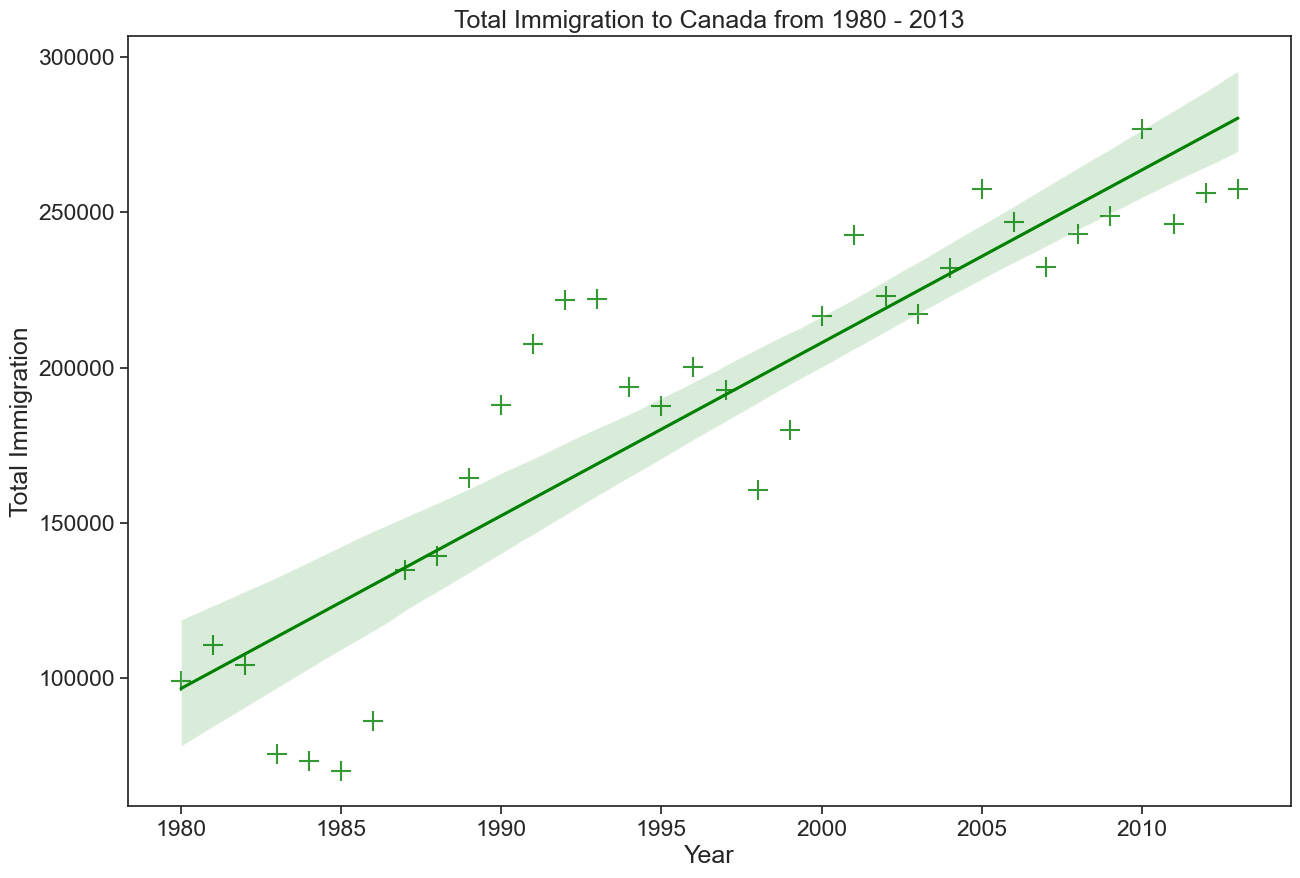

In [8]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

sns.set_style('ticks')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total Immigration to Canada from 1980 - 2013')

# Question: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [9]:
df_countries = canada_df.loc[["Denmark", 'Norway', 'Sweden'], years].transpose()

three_countries = pd.DataFrame(df_countries.sum(axis=1))

three_countries.index = map(float, three_countries.index)

three_countries.reset_index(inplace=True)

three_countries.columns = ['year', 'total']

three_countries.head()

,year,total
0,1980.0,669
1,1981.0,678
2,1982.0,627
3,1983.0,333
4,1984.0,252


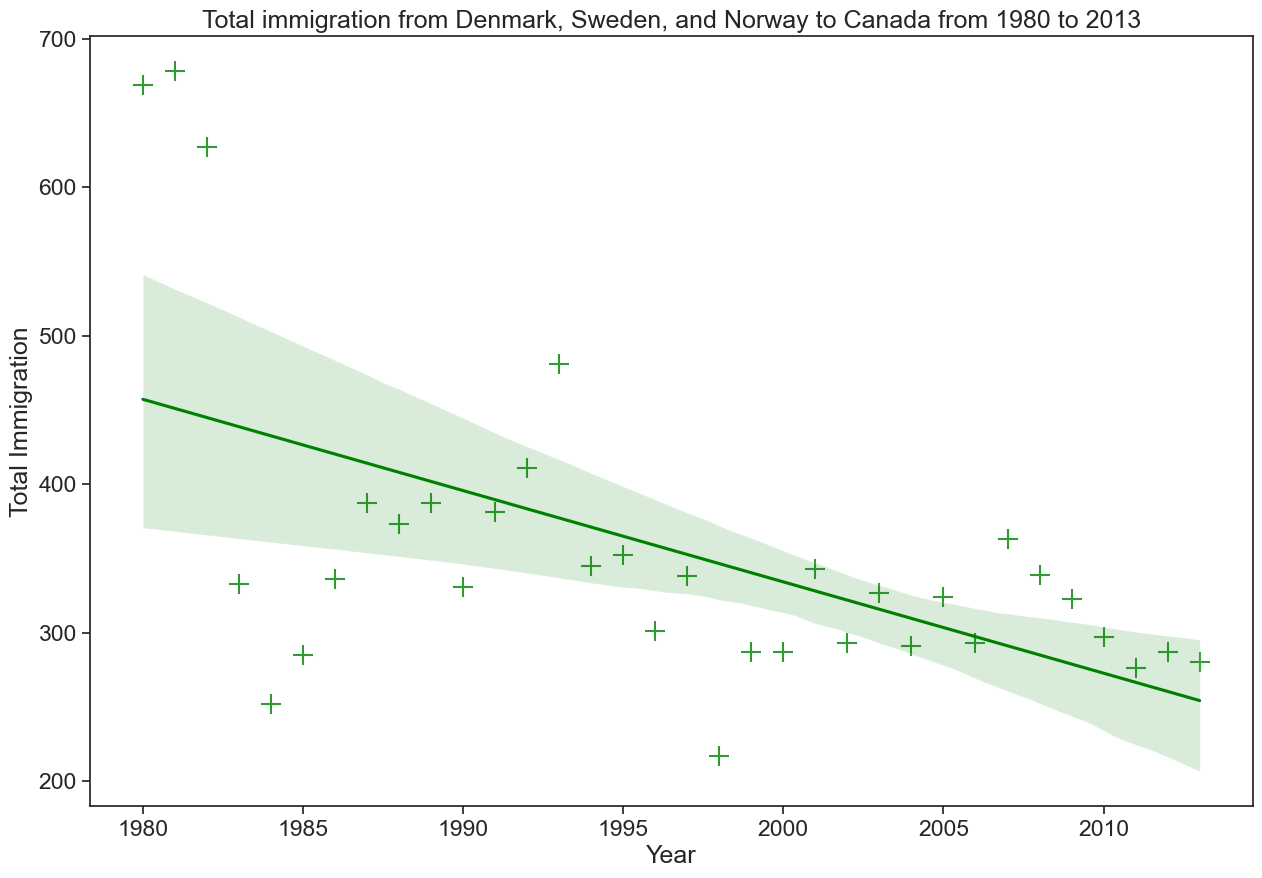

In [10]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

sns.set_style('ticks')

ax = sns.regplot(data=three_countries, x='year', y='total', color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration')

ax.set_title('Total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013')

plt.show();

# 3. Word Clouds

In [11]:
# !pip install wordcloud

In [12]:
alice_novel = open('alice_novel.txt', 'r').read()

In [13]:
stopwords = set(STOPWORDS)

In [14]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords)

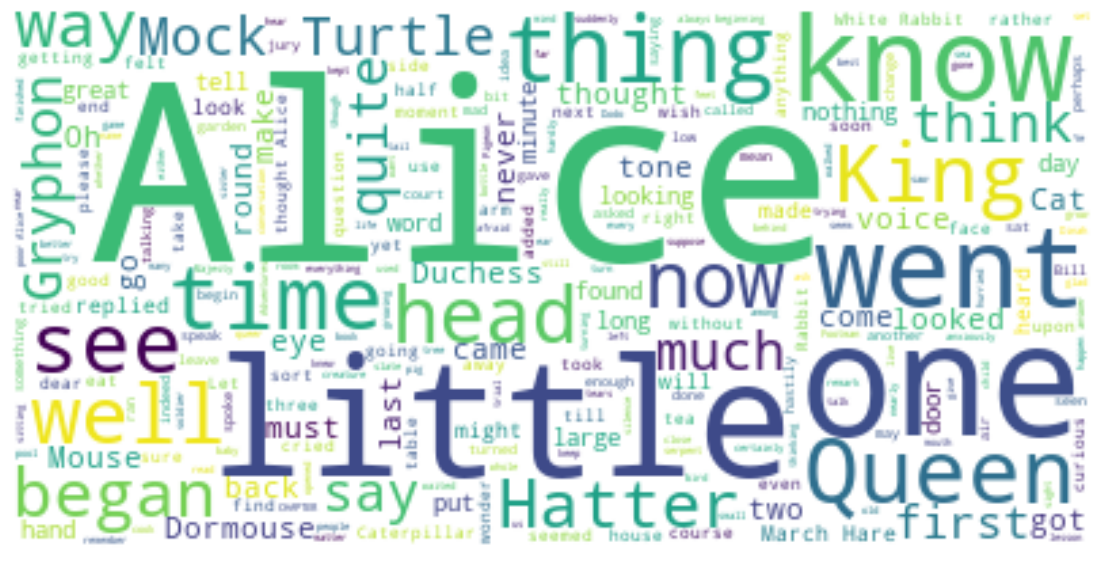

In [15]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show();

In [16]:
total_immigration = canada_df['Total'].sum()

max_words = 90
word_string = ''
for country in canada_df.index.values:
    # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(canada_df.loc[country, 'Total'] / total_immigration * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Word cloud created!


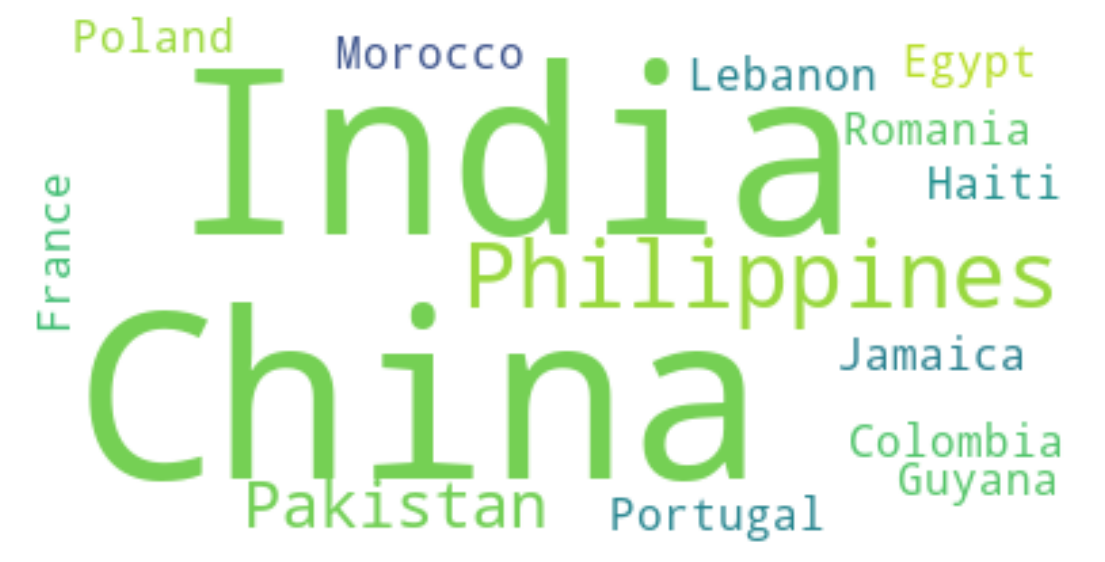

In [17]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()